_An outlier is a data point that is significantly different from the remaining data. Statistical
parameters such as the mean and variance are sensitive to outliers. Outliers may also affect
the performance of some machine learning models, such as linear regression or AdaBoost.
Therefore, we may want to remove or engineer the outliers in the variables of our dataset._

- Trimming outliers from the dataset
- Performing winsorization
- Capping the variable at arbitrary maximum and minimum values
- Performing zero-coding – capping the variable values at zero

## Trimming outliers from the dataset


Trimming or truncating is the process of removing observations that show outliers for one or more variables

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [4]:
boston = load_boston()

In [7]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)[['RM', 'LSTAT', 'CRIM']]

In [8]:
data_boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


<AxesSubplot: >

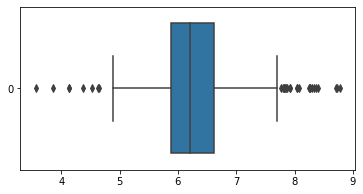

In [22]:
# Making boxplot of RM variable to visualize outliers
plt.figure(figsize=(6,3))
sns.boxplot(data=data_boston['RM'], orient='h')

In [ ]:
# We can see the outliers on both the sides

In [23]:
# Function for finding fences/boundaries of a variable using IQR
def find_boundaries(df, variable, distance):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    
    upp_bnd = q3 + (iqr*distance)
    lwr_bnd = q1 - (iqr*distance)
    return lwr_bnd, upp_bnd

In [24]:
find_boundaries(data_boston, 'RM', 1.5)

(4.778499999999999, 7.730500000000001)

In [25]:
find_boundaries(data_boston, 'CRIM', 2)

(-7.10803, 10.867157500000001)

In [39]:
# Flag function for outliers 
def outliers(df, variable, distance):
    l_b, u_b = find_boundaries(df, variable, distance)
    outliers_df = np.where(df[variable] > u_b, True, np.where(df[variable] < l_b, True, False))
    return outliers_df

In [40]:
outliers = outliers(data_boston, 'RM', 1.5)

In [43]:
# Finally, let's remove the outliers from the dataset:
boston_trimmed = data_boston.loc[~outliers]

In [45]:
boston_trimmed.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


<AxesSubplot: >

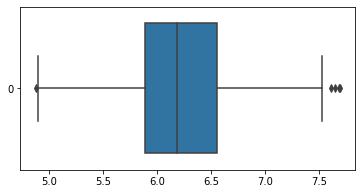

In [46]:
# Let's now check the situation of outliers
plt.figure(figsize=(6,3))
sns.boxplot(boston_trimmed['RM'], orient='h')

### The amount of outliers has gone down so much

*_We can find the outlier boundaries using_*
- 1. Mean() & std dev() of the variable
- 2. From the 5th & 95th Quantile

In [49]:
# Using Mean() & std dev()
def find_boundaries(df, variable, distance): 
    mean = df[variable].mean()
    std = df[variable].std()
    upp_bnd = mean + (distance * std)
    lwr_bnd = mean - (distance * std)
    return lwr_bnd, upp_bnd

In [50]:
find_boundaries(data_boston, 'CRIM', 3)

(-22.19111175868521, 29.418158873309714)

In [52]:
# Using the 5th & 95th Quantile
def find_boundaries(df, variable): 
    q_5 = df[variable].quantile(0.05)
    q_95 = df[variable].quantile(0.95)
    
    upp_bnd = q_95
    lwr_bnd = q_5
    return lwr_bnd, upp_bnd

In [53]:
find_boundaries(data_boston, 'CRIM')

(0.027909999999999997, 15.78915)

## Performing winsorization


Winsorization, or winsorizing, is the process of transforming the data by limiting the
extreme values, that is, the outliers, to a certain arbitrary value, closer to the mean of the
distribution. Winsorizing is different from trimming because the extreme values are not
removed, but are instead replaced by other values.

_Winsorization is symmetric; therefore, the winsorized mean of a symmetric distribution
provides an unbiased representation of the distribution of the variable._

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
import scipy.stats as stats

In [64]:
boston = load_boston()

In [65]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)[['RM', 'LSTAT', 'CRIM']]
data_boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


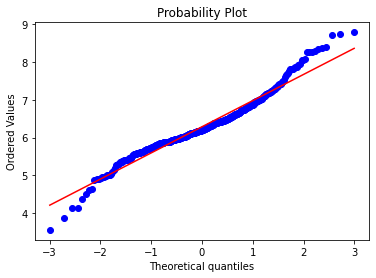

In [67]:
# Let's make a Q-Q plot for RM to see its distribution
stats.probplot(x=data_boston['RM'], plot=plt, dist='norm')
plt.show()

<AxesSubplot: >

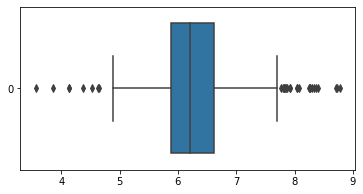

In [68]:
# Boxplot
plt.figure(figsize=(6,3))
sns.boxplot(data_boston['RM'], orient='h')

In [69]:
# Let's make a function to winsorize a variable to arbitrary upper and lower limits
def winsorize(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [70]:
data_boston['RM'] = winsorize(data_boston, 'RM', data_boston['RM'].quantile(0.95), data_boston['RM'].quantile(0.05))

In [71]:
data_boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


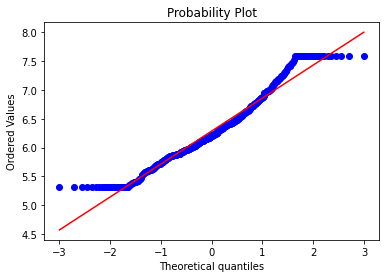

In [72]:
# Making Q-Q Plot for RM after the winsorization
stats.probplot(x=data_boston['RM'], dist='norm', plot=plt)
plt.show()

<AxesSubplot: >

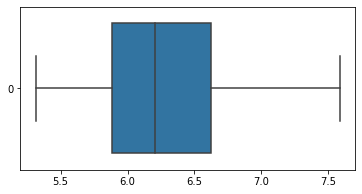

In [73]:
# Making boxplot for RM after winsorization
plt.figure(figsize=(6,3))
sns.boxplot(data_boston['RM'], orient='h')

#### We can see easily how in Q-Q plot the extreme values gets replaced by the respective percentiles & how the outliers got removed in the box plot